# Regression problem

Types of regression

*   **Linear**: predicting a continuous value, i.e. What temperature will it be today?
*   **Logistic**: predicting category of your observation, i.e. Is this a cat or a dog?
*   **Poisson**: predicting a count value, i.e. How many dog will I see in the park?



In [0]:
# import needed libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pylab import fill_between
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

from patsy import dmatrices
import statsmodels.api as sm


In [0]:
def plotTrainingHist(history, epoch, regType):
  plt.figure(figsize=(15,8))
  plt.plot(history.history['val_loss'])
  plt.plot(history.history['loss'])
  plt.xlim(0, epoch)
  plt.xlabel('Epoch')
  plt.legend(['Val_Loss', 'Loss'], loc='upper right')
  plt.title(regType + ': Val_Loss:' + str(round(np.mean(history.history['val_loss']),3)) + ' ' + 'Loss:'+ str(round(np.mean(history.history['loss']),3)), fontsize=14)
  plt.show()

def plotTrainingHist2(history, epoch, regType):
  plt.figure(figsize=(15,8))
  plt.plot(history.history['acc'])
  plt.plot(history.history['loss'])
  plt.xlabel('Epoch')
  plt.legend(['Accuracy', 'Loss'], loc='upper left')
  plt.title(regType + ': Accuracy:' + str(round(np.mean(history.history['acc']),2)) + ' ' + 'Loss:'+ str(round(np.mean(history.history['loss']),2)), fontsize=14)
  plt.show()

def plotTrainingHist3(history, epoch, regType):
  plt.figure(figsize=(15,8))
  plt.plot(history.history['acc'])
  plt.plot(history.history['loss'])
  plt.xlabel('Epoch')
  plt.legend(['Accuracy', 'Loss'], loc='upper left')
  plt.title(regType + ': Accuracy:' + str(round(np.mean(history.history['acc']),2)) + ' ' + 'Loss:'+ str(round(np.mean(history.history['loss']),2)), fontsize=14)
  plt.show()

def confMatrix(X_test, y_test, model, regType):
  y_pred1 = model.predict(X_test)
  y_pred = y_pred1.round(0)
  print(classification_report(y_test, y_pred))
  f, ax = plt.subplots(figsize=(13,8))
  model_y_pred1 = model.predict(X_test, verbose=1)
  model_y_pred= model_y_pred1.round(0)
  model_cm = confusion_matrix(y_test,model_y_pred,[0,1])
  sns.heatmap(model_cm, annot=True, fmt='g', cmap="RdBu", xticklabels = ["0", "1"] , yticklabels = ["0", "1"], ax=ax )
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(regType + ' : Confusion Matrix', fontsize=20)

def classReport(X_test, y_test, model):
  y_pred1 = model.predict(X_test)
  y_pred = y_pred1.round(0)
  print(classification_report(y_test, y_pred))

# Styles for Plotting # 
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)


### Exercise 2

Weather in Szeged [data source](https://www.kaggle.com/budincsevity/szeged-weather)

In [885]:
import pandas as pd
weather = pd.read_csv('weatherHistory.csv')
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [0]:
from subprocess import check_output
import scipy.stats
import datetime
from pylab import rcParams

**TODO: predict future temperature**

In [887]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [0]:
categorical_features = ['Precip Type','Apparent Temperature (C)']
weather_cat = pd.get_dummies(weather[categorical_features])
weather = weather.drop(categorical_features, axis=1)
weather = pd.concat ([weather, weather_cat], axis=1)

In [889]:
weather.head()

,Formatted Date,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Apparent Temperature (C),Precip Type_rain,Precip Type_snow
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,7.388889,1,0
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,7.227778,1,0
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,9.377778,1,0
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,5.944444,1,0
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,6.977778,1,0


In [890]:
weather.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Apparent Temperature (C),Precip Type_rain,Precip Type_snow
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,10.855029,0.883581,0.111059
std,9.551546,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,10.696847,0.320729,0.314207
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-27.716667,0.000000,0.000000
25%,4.688889,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,2.311111,1.000000,0.000000
50%,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,12.000000,1.000000,0.000000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,18.838889,1.000000,0.000000
max,39.905556,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,39.344444,1.000000,1.000000


For attribute Pressure, we can see that the mean values vall in 10003, 

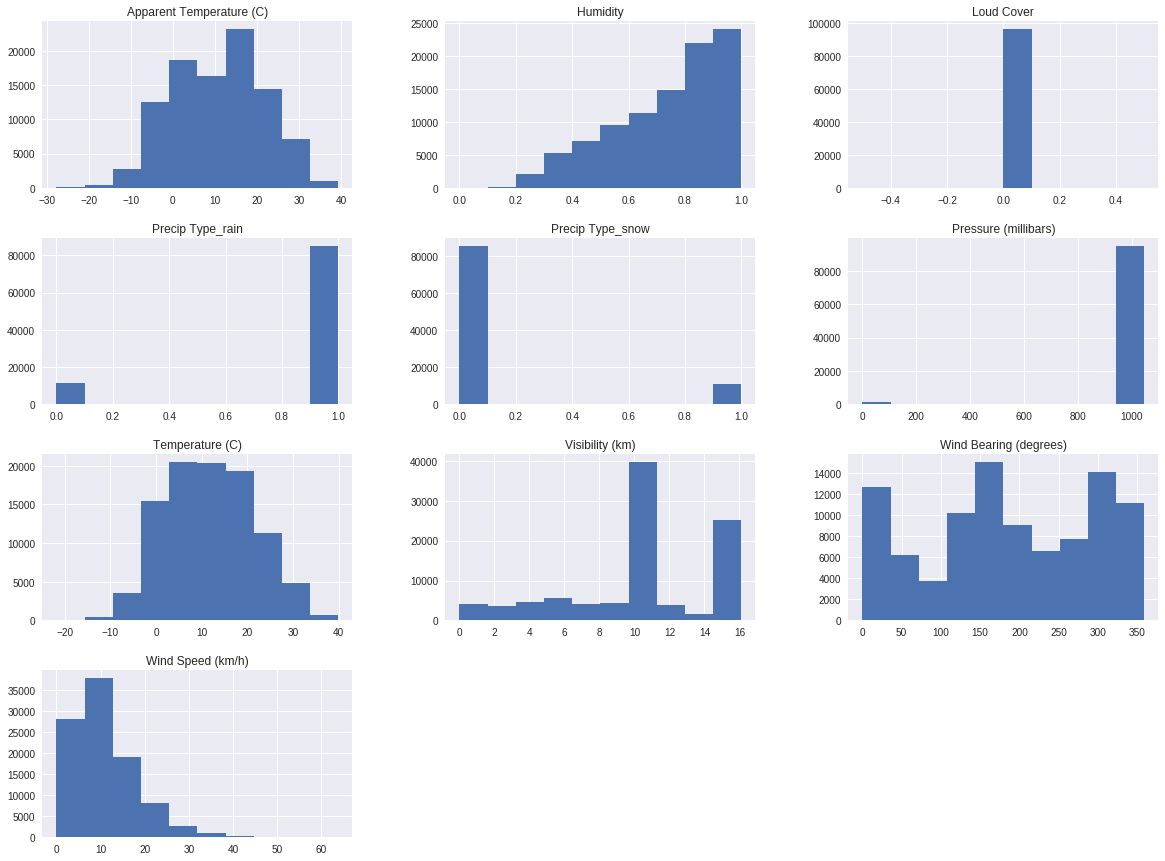

In [891]:
weather.hist(bins=10, figsize=(20,15))
plt.show()

In [892]:
categorical = weather.select_dtypes(include=['object']).keys()
print(categorical)

Index(['Formatted Date', 'Summary', 'Daily Summary'], dtype='object')


In [893]:
quantitative = weather.select_dtypes(include=['int64','float64']).keys()
print(quantitative)

Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Apparent Temperature (C)'],
      dtype='object')


In [0]:
weather['Date'] = pd.to_datetime(weather['Formatted Date'],utc=True)
weather['month']= weather['Date'].dt.month

In [895]:
weather.head()

,Formatted Date,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Apparent Temperature (C),Precip Type_rain,Precip Type_snow,Date,month
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,7.388889,1,0,2006-03-31 22:00:00+00:00,3
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,7.227778,1,0,2006-03-31 23:00:00+00:00,3
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,9.377778,1,0,2006-04-01 00:00:00+00:00,4
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,5.944444,1,0,2006-04-01 01:00:00+00:00,4
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,6.977778,1,0,2006-04-01 02:00:00+00:00,4


In [896]:
weather[quantitative].describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Apparent Temperature (C)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,10.855029
std,9.551546,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,10.696847
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-27.716667
25%,4.688889,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,2.311111
50%,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,12.000000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,18.838889
max,39.905556,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000,39.344444


In [0]:
ss = StandardScaler()
weather2 = weather.copy()
scale_features = ['Pressure (millibars)']
weather[scale_features] = ss.fit_transform(weather[scale_features])

In [898]:
weather[quantitative].describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Apparent Temperature (C)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,9.645300e+04,96453.000000
mean,11.932678,0.734899,10.810640,187.509232,10.347325,0.0,-2.178202e-15,10.855029
std,9.551546,0.195473,6.913571,107.383428,4.192123,0.0,1.000005e+00,10.696847
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.0,-8.576917e+00,-27.716667
25%,4.688889,0.600000,5.828200,116.000000,8.339800,0.0,7.407110e-02,2.311111
50%,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1.129702e-01,12.000000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1.526387e-01,18.838889
max,39.905556,1.000000,63.852600,359.000000,16.100000,0.0,3.688493e-01,39.344444


In [899]:
weather.shape

(96453, 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1509557080>,
      dtype=object)

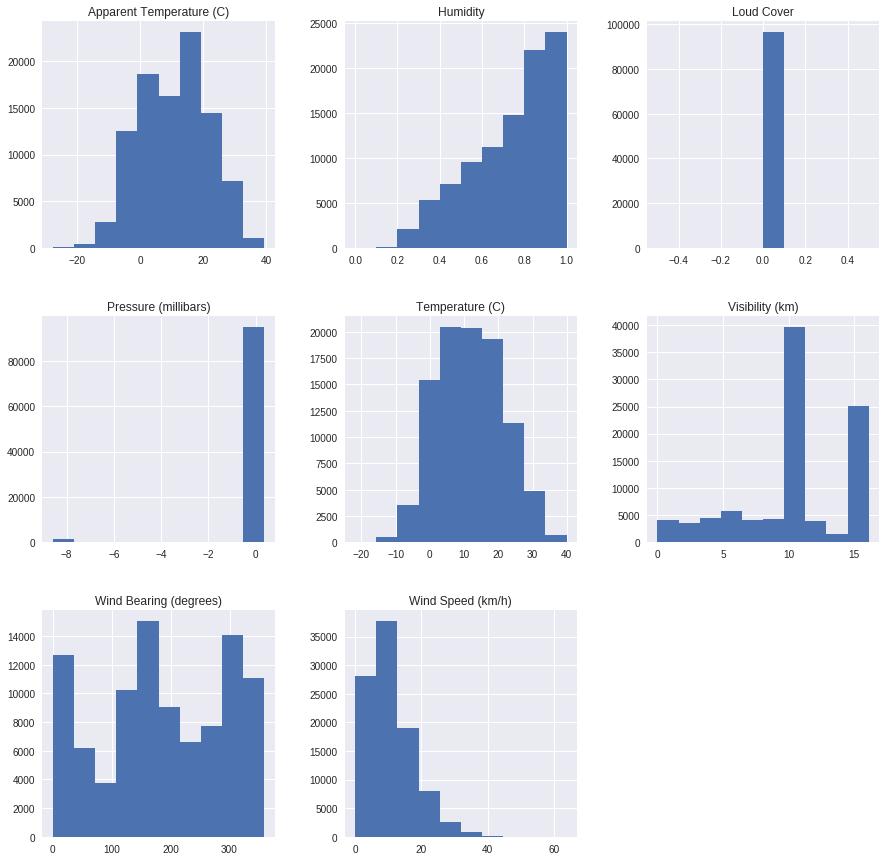

In [900]:
rcParams['figure.figsize']= 15,15
weather[quantitative].hist()

In [0]:
#Since Loud Cover Takes Value ' 0 ' - we drop it
#sns.pairplot(weather)
weather = weather.drop('Loud Cover',axis=1)

In [902]:
weather

,Formatted Date,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Apparent Temperature (C),Precip Type_rain,Precip Type_snow,Date,month
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.472222,0.89,14.1197,251.0,15.8263,0.101685,Partly cloudy throughout the day.,7.388889,1,0,2006-03-31 22:00:00+00:00,3
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.355556,0.86,14.2646,259.0,15.8263,0.105960,Partly cloudy throughout the day.,7.227778,1,0,2006-03-31 23:00:00+00:00,3
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,0.89,3.9284,204.0,14.9569,0.108610,Partly cloudy throughout the day.,9.377778,1,0,2006-04-01 00:00:00+00:00,4
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,8.288889,0.83,14.1036,269.0,15.8263,0.112628,Partly cloudy throughout the day.,5.944444,1,0,2006-04-01 01:00:00+00:00,4
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,8.755556,0.83,11.0446,259.0,15.8263,0.113483,Partly cloudy throughout the day.,6.977778,1,0,2006-04-01 02:00:00+00:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,26.016667,0.43,10.9963,31.0,16.1000,0.095102,Partly cloudy starting in the morning.,26.016667,1,0,2016-09-09 17:00:00+00:00,9
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,24.583333,0.48,10.0947,20.0,15.5526,0.101942,Partly cloudy starting in the morning.,24.583333,1,0,2016-09-09 18:00:00+00:00,9
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,22.038889,0.56,8.9838,30.0,16.1000,0.106216,Partly cloudy starting in the morning.,22.038889,1,0,2016-09-09 19:00:00+00:00,9
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,21.522222,0.60,10.5294,20.0,16.1000,0.108696,Partly cloudy starting in the morning.,21.522222,1,0,2016-09-09 20:00:00+00:00,9


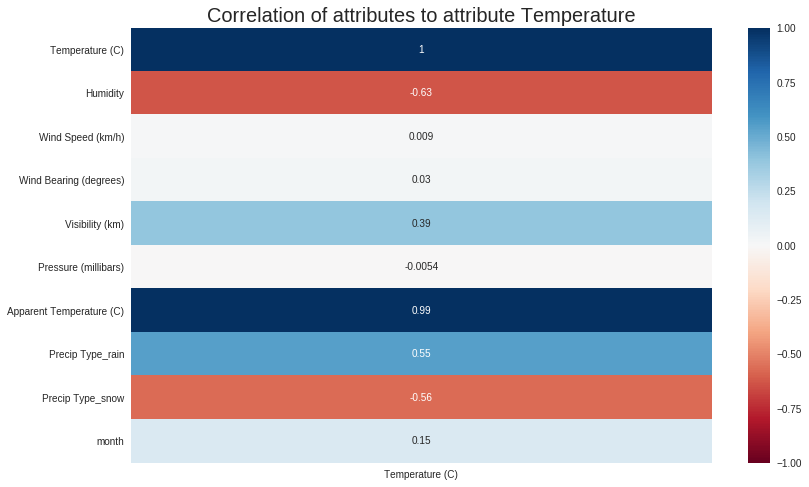

In [903]:
f, ax = plt.subplots(figsize=(13,8))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

ax = sns.heatmap(weather.corr()[['Temperature (C)']], annot=True, vmin=-1, vmax=1, cmap="RdBu", ax=ax)
ax.set_title('Correlation of attributes to attribute Temperature', fontsize=20);

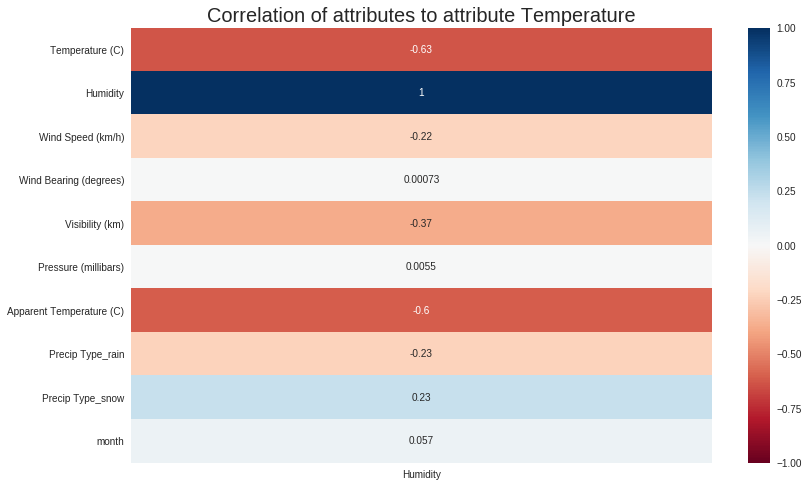

In [904]:
f, ax = plt.subplots(figsize=(13,8))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)

ax = sns.heatmap(weather.corr()[['Humidity']], annot=True, vmin=-1, vmax=1, cmap="RdBu", ax=ax)
ax.set_title('Correlation of attributes to attribute Temperature', fontsize=20);

In [0]:
weather = weather.drop(['Formatted Date','Date','Daily Summary'],axis=1)

In [0]:
# One Hot Representation
categorical_features = ['Summary','month']
weather[categorical_features] = weather[categorical_features].round(2)
weather_cat = pd.get_dummies(weather[categorical_features].astype(str))
weather = weather.drop(categorical_features, axis=1)
weather = pd.concat ([weather, weather_cat], axis=1)

In [907]:
weather.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C),Precip Type_rain,Precip Type_snow,Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Dangerously Windy and Partly Cloudy,Summary_Drizzle,Summary_Dry,Summary_Dry and Mostly Cloudy,Summary_Dry and Partly Cloudy,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Overcast,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,9.472222,0.89,14.1197,251.0,15.8263,0.101685,7.388889,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,9.355556,0.86,14.2646,259.0,15.8263,0.105960,7.227778,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,9.377778,0.89,3.9284,204.0,14.9569,0.108610,9.377778,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,8.288889,0.83,14.1036,269.0,15.8263,0.112628,5.944444,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,8.755556,0.83,11.0446,259.0,15.8263,0.113483,6.977778,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
weather_output=['Temperature (C)','Humidity']
X = weather.drop (weather_output, axis=1).values
y = weather[weather_output].values

##### Basic Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
ls = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)

In [910]:
d1_linear = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
d1_linear

,Actual,Predicted
0,14.422222,14.013059
1,0.930000,0.782567
2,12.155556,13.125442
3,0.720000,0.711513
4,23.961111,23.720451
...,...,...
57867,0.930000,0.909033
57868,2.433333,1.667237
57869,0.910000,0.980098
57870,15.888889,16.209580


In [911]:
pd.DataFrame(y_pred)

,0,1
0,14.013059,0.782567
1,13.125442,0.711513
2,23.720451,0.641879
3,14.966007,0.740128
4,13.047108,0.817679
...,...,...
28931,24.704649,0.617107
28932,17.581119,0.776176
28933,5.151514,0.909033
28934,1.667237,0.980098


In [912]:
pd.DataFrame(y)

,0,1
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83
...,...,...
96448,26.016667,0.43
96449,24.583333,0.48
96450,22.038889,0.56
96451,21.522222,0.60


<Figure size 1080x1080 with 0 Axes>

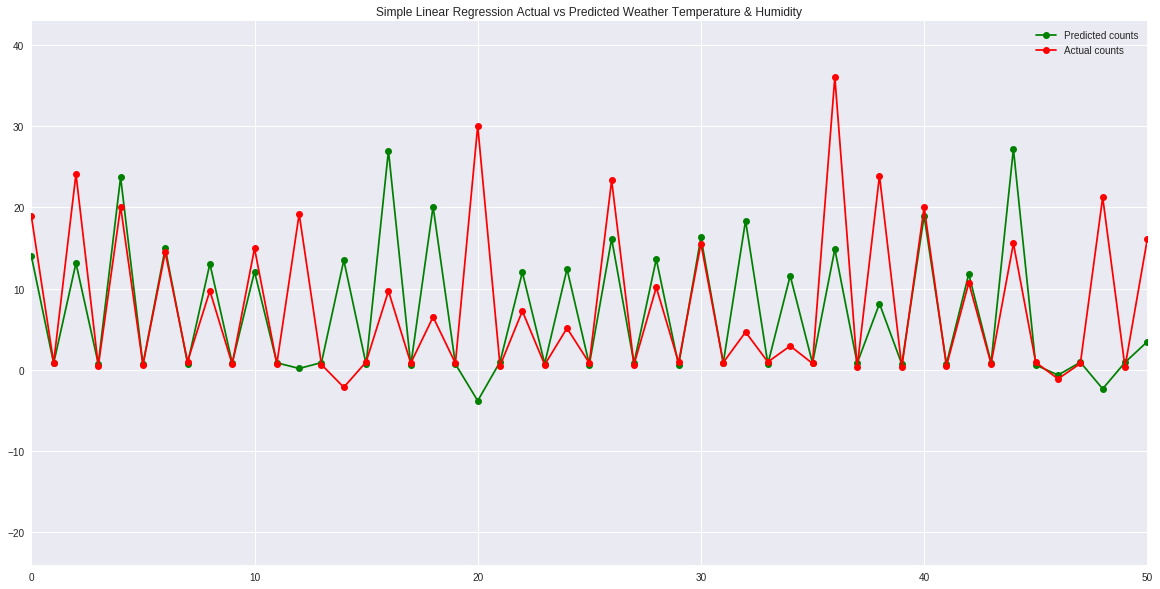

In [928]:
fig = plt.figure()

plt.figure(figsize=(20,10))
plt.title('Simple Linear Regression Actual vs Predicted Weather Temperature & Humidity')
plt.xlim(0,50)
predicted, = plt.plot(pd.DataFrame(y_pred.flatten()), 'go-', label='Predicted counts')
actual, = plt.plot(pd.DataFrame(y_test.flatten()), 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
 
plt.show()

In [914]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4017156804517408
Mean Squared Error: 0.4243415397539342
Root Mean Squared Error: 0.6514150288057025


In [915]:
weather.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C),Precip Type_rain,Precip Type_snow,Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Dangerously Windy and Partly Cloudy,Summary_Drizzle,Summary_Dry,Summary_Dry and Mostly Cloudy,Summary_Dry and Partly Cloudy,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Overcast,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,9.645300e+04,96453.000000,96453.000000,96453.000000,96453.000000,96453.00000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.00000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.00000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,0.734899,10.810640,187.509232,10.347325,-2.178202e-15,10.855029,0.883581,0.111059,0.000560,0.00001,0.000363,0.005350,0.005474,0.004002,0.112905,0.00001,0.000404,0.000353,0.000145,0.000892,0.074109,0.000415,0.000073,0.000176,0.000653,0.291271,0.172073,0.329000,0.000104,0.000083,0.00001,0.000041,0.000363,0.000467,0.000695,0.084850,0.084850,0.082113,0.084850,0.077385,0.084850,0.082113,0.084850,0.082113,0.084819,0.085098,0.082113
std,9.551546,0.195473,6.913571,107.383428,4.192123,1.000005e+00,10.696847,0.320729,0.314207,0.023655,0.00322,0.019046,0.072946,0.073785,0.063135,0.316478,0.00322,0.020104,0.018772,0.012047,0.029847,0.261949,0.020360,0.008519,0.013275,0.025549,0.454351,0.377446,0.469852,0.010182,0.009107,0.00322,0.006440,0.019046,0.021595,0.026347,0.278659,0.278659,0.274538,0.278659,0.267202,0.278659,0.274538,0.278659,0.274538,0.278613,0.279030,0.274538
min,-21.822222,0.000000,0.000000,0.000000,0.000000,-8.576917e+00,-27.716667,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,0.600000,5.828200,116.000000,8.339800,7.407110e-02,2.311111,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,0.780000,9.965900,180.000000,10.046400,1.129702e-01,12.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,1.526387e-01,18.838889,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000

##### Linear Regression with Keras

In [916]:
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.30, random_state=1)
lr_model = Sequential()
lr_model.add(Dense(2,input_shape=(X.shape[1],),activation='relu'))
lr_model.compile(Adam(lr=0.08),'mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss',patience=8,verbose=1)
lr_history = lr_model.fit(X_train,y_train, verbose=2, epochs=90, validation_data=(X_test,y_test), batch_size=70,callbacks=[early_stop])

Train on 67517 samples, validate on 28936 samples
Epoch 1/90
 - 9s - loss: 12.8555 - val_loss: 2.0409
Epoch 2/90
 - 3s - loss: 1.8806 - val_loss: 1.7421
Epoch 3/90
 - 3s - loss: 2.0343 - val_loss: 3.0578
Epoch 4/90
 - 3s - loss: 2.0179 - val_loss: 1.7394
Epoch 5/90
 - 3s - loss: 2.0055 - val_loss: 1.7608
Epoch 6/90
 - 3s - loss: 2.0627 - val_loss: 2.4878
Epoch 7/90
 - 3s - loss: 2.0148 - val_loss: 1.7412
Epoch 8/90
 - 3s - loss: 1.9642 - val_loss: 3.6143
Epoch 9/90
 - 3s - loss: 2.1008 - val_loss: 2.2210
Epoch 10/90
 - 3s - loss: 2.0704 - val_loss: 1.9047
Epoch 11/90
 - 3s - loss: 1.9598 - val_loss: 1.7572
Epoch 12/90
 - 3s - loss: 1.9869 - val_loss: 1.7441
Epoch 00012: early stopping


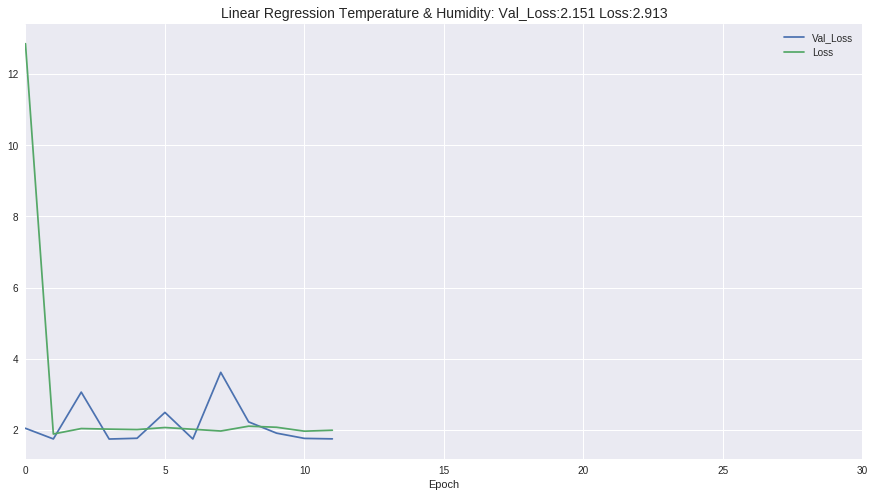

In [917]:
plotTrainingHist(lr_history, 30, 'Linear Regression Temperature & Humidity')

In [0]:
y_pred1 = lr_model.predict(X_test)

<Figure size 1080x1080 with 0 Axes>

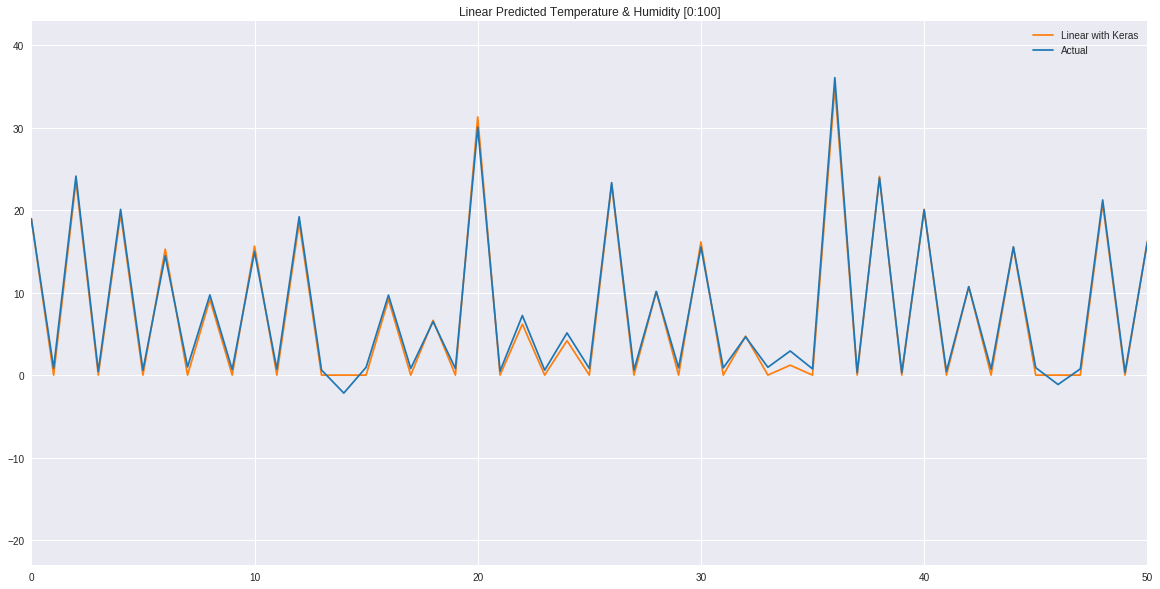

In [919]:
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.title('Keras Linear Regression Actual vs Predicted Weather Temperature & Humidity')
plt.xlim(0,50)
predicted, = plt.plot(pd.DataFrame(y_pred1.flatten()),color=tableau20[2], label='Linear with Keras')
actual, = plt.plot(pd.DataFrame(y_test.flatten()),color=tableau20[0], label='Actual')
plt.legend(handles=[predicted, actual])
 
plt.show()

In [920]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.567629986132747
Mean Squared Error: 90.96099105845214
Root Mean Squared Error: 9.537347170909326


#####Neural Network Regression

In [934]:
X_train2, X_test2 , y_train2 , y_test2 = train_test_split(X, y, test_size=0.30, random_state=1)
dnn_model = Sequential()
dnn_model.add(Dense(32,input_shape=(X.shape[1],),activation='relu'))
dnn_model.add(Dense(16,activation='relu'))
dnn_model.add(Dense(4,activation='relu'))
dnn_model.add(Dense(2))
dnn_model.compile(Adam(lr=0.002),'mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss',patience=8,verbose=1)
dn_history = dnn_model.fit(X_train2,y_train2, verbose=2, epochs=90, validation_data=(X_test2,y_test2), batch_size=70, callbacks=[early_stop])

Train on 67517 samples, validate on 28936 samples
Epoch 1/90
 - 9s - loss: 118.4899 - val_loss: 97.1699
Epoch 2/90
 - 3s - loss: 87.6864 - val_loss: 79.4335
Epoch 3/90
 - 3s - loss: 71.4124 - val_loss: 64.5065
Epoch 4/90
 - 3s - loss: 57.7317 - val_loss: 51.9327
Epoch 5/90
 - 3s - loss: 46.2772 - val_loss: 41.4570
Epoch 6/90
 - 3s - loss: 36.7524 - val_loss: 32.7758
Epoch 7/90
 - 3s - loss: 28.8521 - val_loss: 25.5788
Epoch 8/90
 - 3s - loss: 22.4171 - val_loss: 19.7592
Epoch 9/90
 - 3s - loss: 17.1977 - val_loss: 15.0824
Epoch 10/90
 - 3s - loss: 13.0460 - val_loss: 11.4301
Epoch 11/90
 - 3s - loss: 9.7993 - val_loss: 8.5015
Epoch 12/90
 - 3s - loss: 7.2638 - val_loss: 6.3595
Epoch 13/90
 - 3s - loss: 5.3202 - val_loss: 4.5554
Epoch 14/90
 - 3s - loss: 3.8507 - val_loss: 3.2862
Epoch 15/90
 - 3s - loss: 2.7446 - val_loss: 2.3203
Epoch 16/90
 - 3s - loss: 1.9554 - val_loss: 1.6829
Epoch 17/90
 - 3s - loss: 1.3697 - val_loss: 1.1405
Epoch 18/90
 - 3s - loss: 0.9627 - val_loss: 0.8174
Ep

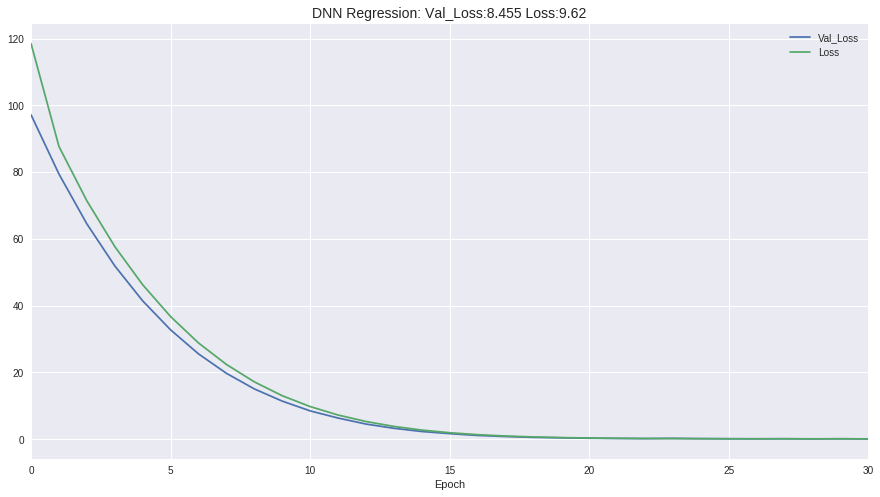

In [935]:
plotTrainingHist(dn_history, 30, 'DNN Regression')

In [0]:
y_pred2 = dnn_model.predict(X_test)

<Figure size 1080x1080 with 0 Axes>

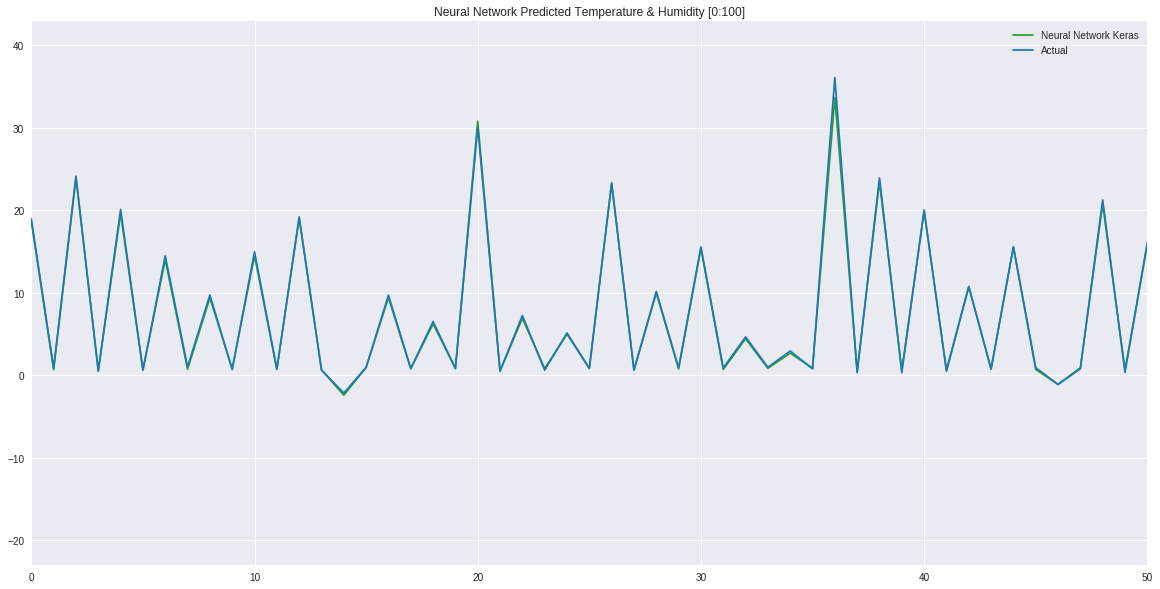

In [937]:
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.title('Neural Network Predicted Temperature & Humidity [0:100]')
plt.xlim(0,50)
predicted, = plt.plot(pd.DataFrame(y_pred2.flatten()),color=tableau20[4], label='Neural Network Keras')
actual, = plt.plot(pd.DataFrame(y_test2.flatten()),color=tableau20[0], label='Actual')
plt.legend(handles=[predicted, actual])
 
plt.show()

In [925]:
print('Mean Absolute Error:', mean_absolute_error(y_test2, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test2, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test2, y_pred)))

Mean Absolute Error: 5.567629986132747
Mean Squared Error: 90.96099105845214
Root Mean Squared Error: 9.537347170909326
